# Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
# from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing

## Vlad's 1st experiment

In [5]:
X_train = pd.read_csv("train_data/EDA_vlad_1_results.csv")
# Take segments id 19 to 58
X_train = X_train[380:1180]
X_train.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Markers,Segment id,Unnamed: 26
380,380,0,00:06:20,2023-07-11,16:56:57,2.0,97.714295,5.0,0.023156,8.349160,...,42.645281,0.004673,0.0,0.0,29.0,-0.006225,29.0,NaN,19.0,NaN
381,381,0,00:06:21,2023-07-11,16:56:58,2.0,97.702249,5.0,0.018034,8.298571,...,42.645281,0.004744,0.0,0.0,29.0,-0.006348,29.0,NaN,19.0,NaN
382,382,0,00:06:22,2023-07-11,16:56:59,2.0,97.684459,5.0,0.014045,8.253473,...,42.645281,0.003056,0.0,0.0,29.0,-0.006390,29.0,NaN,19.0,NaN
383,383,0,00:06:23,2023-07-11,16:57:00,2.0,97.664046,5.0,0.010938,8.215360,...,42.645281,0.003090,0.0,0.0,29.0,-0.006052,29.0,NaN,19.0,NaN
384,384,0,00:06:24,2023-07-11,16:57:01,2.0,97.645544,5.0,0.008519,8.187131,...,42.405239,0.005561,0.0,0.0,29.0,-0.005315,29.0,NaN,19.0,NaN


In [6]:
Y_train = pd.read_csv("train_data/EDA_vlad_1.csv")
# Take segments id 19 to 58
Y_train = Y_train[19:59]
Y_train

,Segment id,label
19,19,no
20,20,no
21,21,no
22,22,no
23,23,no
24,24,no
25,25,no
26,26,no
27,27,no
28,28,no


In [7]:
# Select the desired columns
selected_columns = ['Segment id', 'EdaArousalMean []']
df = pd.DataFrame(X_train)
X_data = df[selected_columns]
X_data

,Segment id,EdaArousalMean []
380,19.0,2.315570e-02
381,19.0,1.803368e-02
382,19.0,1.404464e-02
383,19.0,1.093798e-02
384,19.0,8.518505e-03
...,...,...
1175,58.0,7.216300e-16
1176,58.0,5.620060e-16
1177,58.0,4.376910e-16
1178,58.0,3.408740e-16


### Encoding the labels

In [8]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(Y_train.label)
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
Y_train["encoded_label"] = encoded_labels
Y_train

,Segment id,label,encoded_label
19,19,no,0
20,20,no,0
21,21,no,0
22,22,no,0
23,23,no,0
24,24,no,0
25,25,no,0
26,26,no,0
27,27,no,0
28,28,no,0


### Organaize data

In [10]:
# Merge the data and labels based on the 'series_id' column
merged_data = pd.merge(X_data, Y_train, on='Segment id')
merged_data

,Segment id,EdaArousalMean [],label,encoded_label
0,19.0,2.315570e-02,no,0
1,19.0,1.803368e-02,no,0
2,19.0,1.404464e-02,no,0
3,19.0,1.093798e-02,no,0
4,19.0,8.518505e-03,no,0
...,...,...,...,...
795,58.0,7.216300e-16,no,0
796,58.0,5.620060e-16,no,0
797,58.0,4.376910e-16,no,0
798,58.0,3.408740e-16,no,0


In [11]:
# Extract the measuremens columns as time series data
X_custom = merged_data.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom

array([list([0.023155699, 0.018033676, 0.014044641, 0.010937978, 0.008518505, 0.006634219, 0.005166735, 0.004023857, 0.003133783, 0.002440593, 0.001900735, 0.001480294, 0.001152854, 0.000897844, 0.000699242, 0.00054457, 0.000424111, 0.000330298, 0.000257237, 0.000200336]),
       list([0.000156022, 0.00012151, 9.4632e-05, 7.36995e-05, 5.73972e-05, 4.4701e-05, 3.48132e-05, 2.71125e-05, 2.11153e-05, 1.64446e-05, 1.28071e-05, 9.97414e-06, 7.76787e-06, 6.04962e-06, 4.71145e-06, 3.66928e-06, 2.85764e-06, 2.22553e-06, 1.73325e-06, 1.34985e-06]),
       list([1.05127e-06, 8.18728e-07, 6.37626e-07, 4.96583e-07, 3.8674e-07, 3.01193e-07, 2.34569e-07, 1.82683e-07, 1.42274e-07, 1.10803e-07, 8.62933e-08, 6.72053e-08, 5.23395e-08, 0.015763245, 0.303056237, 0.245865009, 0.191479862, 0.149124666, 0.116138407, 0.090448682]),
       list([0.070441505, 0.054859899, 0.042724932, 0.033274211, 0.113932717, 0.128482878, 0.100062566, 0.077928805, 0.146857909, 0.166194591, 0.129432478, 0.150949921, 0.158337828

In [12]:
Y_custom = Y_train["encoded_label"].values
Y_custom

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Vlad's 2nd experiment

In [17]:
X_train1 = pd.read_csv("train_data/EDA_vlad_2_results.csv")
# Take segments 3 to 43
X_train1 = X_train1[60:880]
X_train1.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationForward [deg],InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id
60,60,0,00:01:00,2023-07-11,17:26:01,2,100.536476,5,0.427687,9.062784,...,87.766423,37.166398,0.227796,0,1,27.7,-0.020075,27.7,NaN,3
61,61,0,00:01:01,2023-07-11,17:26:02,2,100.509342,5,0.333083,9.143783,...,87.766423,37.166398,0.278153,0,2,27.7,-0.017381,27.7,NaN,3
62,62,0,00:01:02,2023-07-11,17:26:03,2,100.458276,5,0.259405,9.148984,...,87.766423,37.166398,0.210692,0,0,27.7,-0.013896,27.7,Mark - Start,3
63,63,0,00:01:03,2023-07-11,17:26:04,2,100.394854,5,0.202025,9.050531,...,87.766423,37.166398,0.304300,0,1,27.7,-0.010250,27.7,NaN,3
64,64,0,00:01:04,2023-07-11,17:26:05,2,100.343395,5,0.497035,8.671568,...,107.638195,42.669686,0.224496,0,0,27.7,-0.006618,27.7,NaN,3


In [18]:
Y_train1 = pd.read_csv("train_data/EDA_vlad_2.csv")
# Take segments 3 to 43
Y_train1 = Y_train1[3:44]
Y_train1

,Segment id,label
3,3,no
4,4,no
5,5,no
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no
11,11,no
12,12,no


In [19]:
# Select the desired columns
selected_columns1 = ['Segment id', 'EdaArousalMean []']
df1 = pd.DataFrame(X_train1)
X_data1 = df1[selected_columns1]
X_data1

,Segment id,EdaArousalMean []
60,3,0.427687
61,3,0.333083
62,3,0.259405
63,3,0.202025
64,3,0.497035
...,...,...
875,43,0.001763
876,43,0.001373
877,43,0.001069
878,43,0.000833


### Encoding the labels

In [20]:
encoded_labels1 = label_encoder.fit_transform(Y_train1.label)
encoded_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [21]:
Y_train1["encoded_label"] = encoded_labels1
Y_train1

,Segment id,label,encoded_label
3,3,no,0
4,4,no,0
5,5,no,0
6,6,no,0
7,7,no,0
8,8,no,0
9,9,no,0
10,10,no,0
11,11,no,0
12,12,no,0


### Organaize data

In [22]:
# Merge the data and labels based on the 'series_id' column
merged_data1 = pd.merge(X_data1, Y_train1, on='Segment id')
merged_data1

,Segment id,EdaArousalMean [],label,encoded_label
0,3,0.427687,no,0
1,3,0.333083,no,0
2,3,0.259405,no,0
3,3,0.202025,no,0
4,3,0.497035,no,0
...,...,...,...,...
815,43,0.001763,no,0
816,43,0.001373,no,0
817,43,0.001069,no,0
818,43,0.000833,no,0


In [23]:
# Extract the measuremens columns as time series data
X_custom1 = merged_data1.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom1

array([list([0.427687084, 0.333083036, 0.259405329, 0.202025074, 0.497034597, 0.68164958, 0.530869227, 0.413441369, 0.321988462, 0.250764867, 0.195295874, 0.15209658, 0.118452936, 0.092251239, 0.071845337, 0.055953205, 0.0435764, 0.033937334, 0.026430422, 0.020584034]),
       list([0.016030862, 0.012484848, 0.009723209, 0.007572443, 0.005897424, 0.004592919, 0.003576969, 0.002785746, 0.002169541, 0.00168964, 0.001315893, 0.001024819, 0.00079813, 0.000621584, 0.00048409, 0.00037701, 0.000293615, 0.000228668, 0.000178087, 0.000138694]),
       list([0.000108015, 8.41222e-05, 6.55145e-05, 5.10227e-05, 3.97365e-05, 3.09468e-05, 2.41014e-05, 1.87702e-05, 0.862759539, 1.17398173, 0.91429789, 0.712055913, 0.554549703, 0.431883743, 0.336351397, 0.400195271, 0.34363915, 0.267626439, 0.208427681, 0.162323641]),
       list([0.126417779, 0.098454265, 0.076676259, 0.05971553, 0.046506502, 0.095802942, 0.150189563, 0.116967749, 0.196725346, 0.202430142, 0.157652753, 0.122780087, 0.095621228, 0.074

In [24]:
# Extract the 'label' column as labels
Y_custom1 = Y_train1["encoded_label"].values
Y_custom1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Organaize data for training

### Merge Vlad's 1st and 2nd experiments data

In [25]:
# Merge Vlad's 1st and 2nd experiments X data
merged_X1 = np.concatenate((X_custom, X_custom1), axis=0)
merged_X1

array([list([0.023155699, 0.018033676, 0.014044641, 0.010937978, 0.008518505, 0.006634219, 0.005166735, 0.004023857, 0.003133783, 0.002440593, 0.001900735, 0.001480294, 0.001152854, 0.000897844, 0.000699242, 0.00054457, 0.000424111, 0.000330298, 0.000257237, 0.000200336]),
       list([0.000156022, 0.00012151, 9.4632e-05, 7.36995e-05, 5.73972e-05, 4.4701e-05, 3.48132e-05, 2.71125e-05, 2.11153e-05, 1.64446e-05, 1.28071e-05, 9.97414e-06, 7.76787e-06, 6.04962e-06, 4.71145e-06, 3.66928e-06, 2.85764e-06, 2.22553e-06, 1.73325e-06, 1.34985e-06]),
       list([1.05127e-06, 8.18728e-07, 6.37626e-07, 4.96583e-07, 3.8674e-07, 3.01193e-07, 2.34569e-07, 1.82683e-07, 1.42274e-07, 1.10803e-07, 8.62933e-08, 6.72053e-08, 5.23395e-08, 0.015763245, 0.303056237, 0.245865009, 0.191479862, 0.149124666, 0.116138407, 0.090448682]),
       list([0.070441505, 0.054859899, 0.042724932, 0.033274211, 0.113932717, 0.128482878, 0.100062566, 0.077928805, 0.146857909, 0.166194591, 0.129432478, 0.150949921, 0.158337828

In [26]:
# Merge Vlad's 1st and 2nd experiments Y data
merged_Y1 = np.concatenate((Y_custom, Y_custom1), axis=0)
merged_Y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [27]:
# Convert the merged X values to a 2D NumPy array
X_custom_np1 = np.vstack(merged_X1)
X_custom_np1

array([[2.31556990e-02, 1.80336760e-02, 1.40446410e-02, ...,
        3.30298000e-04, 2.57237000e-04, 2.00336000e-04],
       [1.56022000e-04, 1.21510000e-04, 9.46320000e-05, ...,
        2.22553000e-06, 1.73325000e-06, 1.34985000e-06],
       [1.05127000e-06, 8.18728000e-07, 6.37626000e-07, ...,
        1.49124666e-01, 1.16138407e-01, 9.04486820e-02],
       ...,
       [2.85493000e-04, 2.22343000e-04, 1.73161000e-04, ...,
        4.07235000e-06, 3.17155000e-06, 2.47000000e-06],
       [1.92364000e-06, 1.49813000e-06, 1.16675000e-06, ...,
        1.58676351e-01, 1.23577266e-01, 9.62420720e-02],
       [7.49534010e-02, 5.83737670e-02, 4.54615360e-02, ...,
        1.06915300e-03, 8.32657000e-04, 6.48474000e-04]])

### Segment labels

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
plt.rcParams["figure.figsize"] = 16, 10

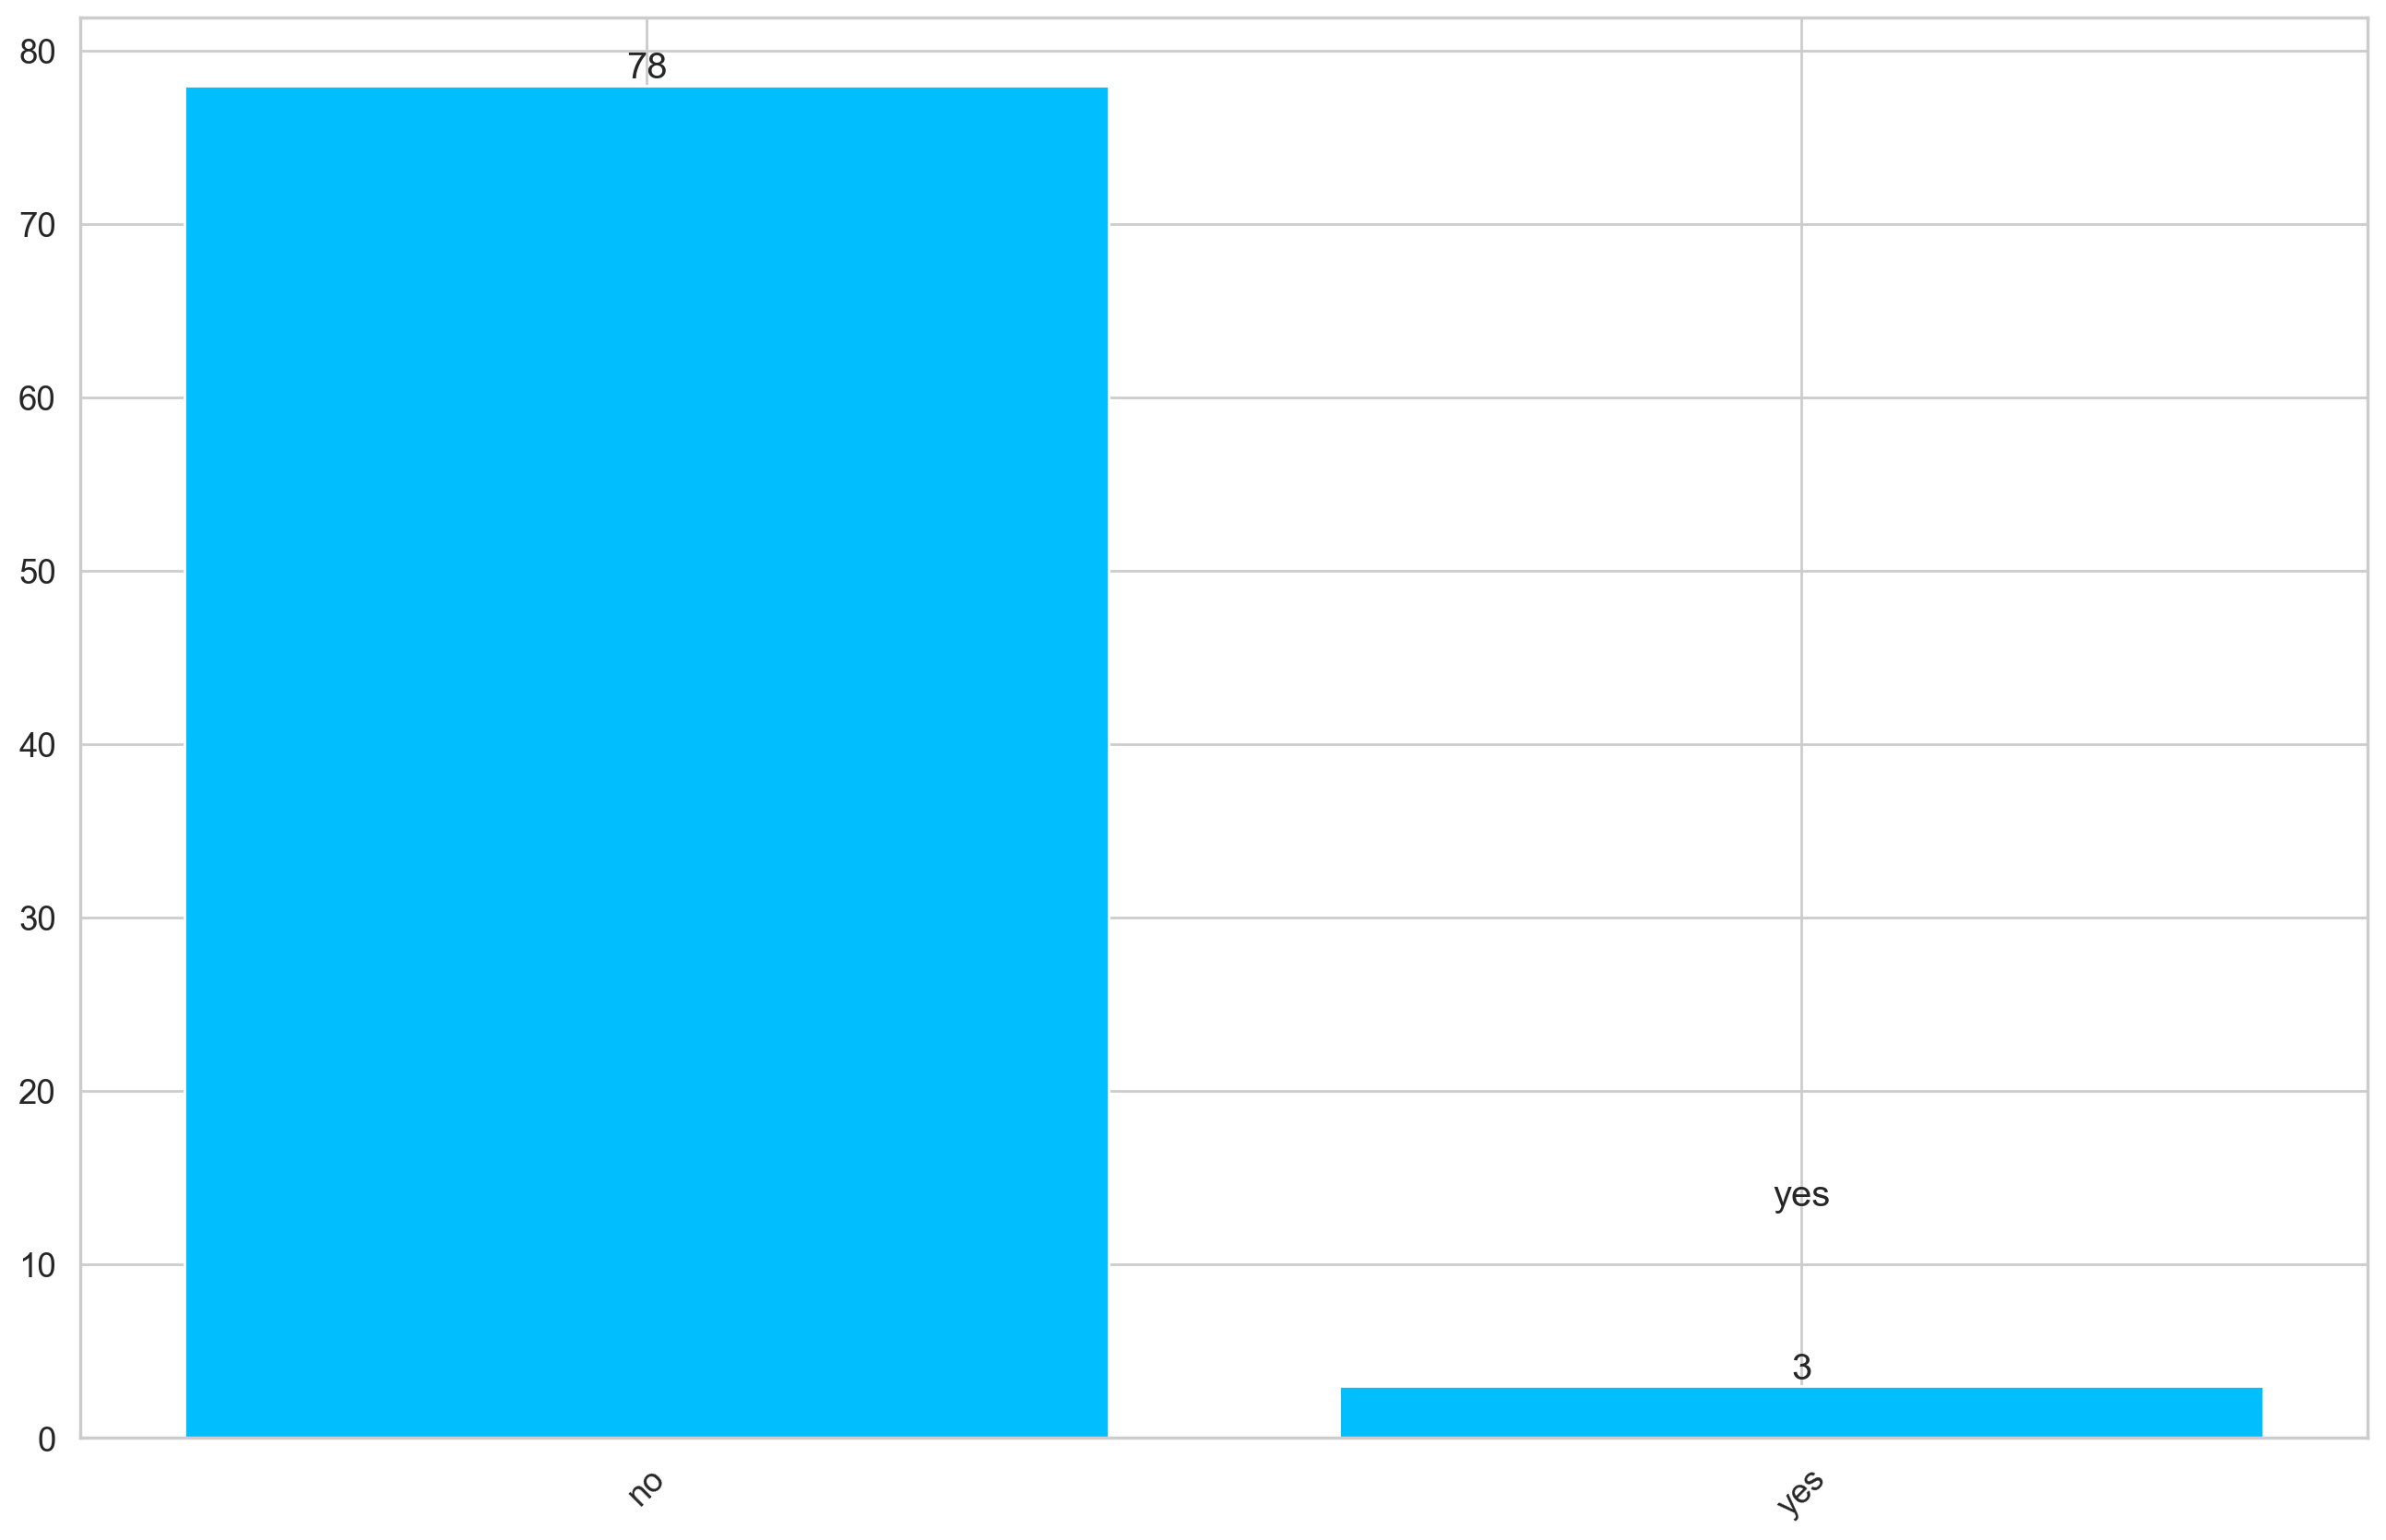

In [29]:
# Count occurrences of 0s and 1s
value_counts = np.bincount(merged_Y1)  # Count occurrences of 0s and 1s

# Create a bar plot
plt.bar(range(len(value_counts)), value_counts)

# Map 0 to "no" and 1 to "yes" for labeling
label_mapping = {0: 'no', 1: 'yes'}

# Add labels to the bars with mapped values
for i, count in enumerate(value_counts):
    label = label_mapping.get(i, str(i))  # Use the mapped label or the original value if not found in the mapping
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
    plt.annotate(label, (i, count + 10), ha='center', va='bottom')  # Add labels above the bars

# Set x-axis labels and rotate them if needed
plt.xticks(range(len(value_counts)), [label_mapping.get(i, str(i)) for i in range(len(value_counts))], rotation=45)

# Show the plot
plt.show()

### Convert X data to stddev and mean statistics

In [31]:
for l in X_custom_np1:
    print(l)
    print()

[0.0231557  0.01803368 0.01404464 0.01093798 0.0085185  0.00663422
 0.00516674 0.00402386 0.00313378 0.00244059 0.00190073 0.00148029
 0.00115285 0.00089784 0.00069924 0.00054457 0.00042411 0.0003303
 0.00025724 0.00020034]

[1.56022e-04 1.21510e-04 9.46320e-05 7.36995e-05 5.73972e-05 4.47010e-05
 3.48132e-05 2.71125e-05 2.11153e-05 1.64446e-05 1.28071e-05 9.97414e-06
 7.76787e-06 6.04962e-06 4.71145e-06 3.66928e-06 2.85764e-06 2.22553e-06
 1.73325e-06 1.34985e-06]

[1.05127000e-06 8.18728000e-07 6.37626000e-07 4.96583000e-07
 3.86740000e-07 3.01193000e-07 2.34569000e-07 1.82683000e-07
 1.42274000e-07 1.10803000e-07 8.62933000e-08 6.72053000e-08
 5.23395000e-08 1.57632450e-02 3.03056237e-01 2.45865009e-01
 1.91479862e-01 1.49124666e-01 1.16138407e-01 9.04486820e-02]

[0.07044151 0.0548599  0.04272493 0.03327421 0.11393272 0.12848288
 0.10006257 0.07792881 0.14685791 0.16619459 0.12943248 0.15094992
 0.15833783 0.12331362 0.09603675 0.07479349 0.05824923 0.04536455
 0.03532995 0.0275149

# Train model on Vlad's data and save

# Load and test model on Lior's data